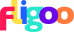

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**

#### Part 1
During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
  - **Expected**:
    - Make at least 10 plots with any ploting library (plotly, matplotlib, seaborn, etc.)
    - Write down the conclusions, in a clear manner, of every plot in this notebook

#### Part 2
In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - **Feature extraction:** Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
      - **Expected**:
        - Create **one** scikit-learn pipeline inside a file called `pipelines.py`
        - Create at least **three** scikit-learn transformers inside a file called `transformers.py` and use them inside the pipeline from previous step. This transformers should add new features or clean the original dataframe of this take-home
          - Feature example: Compute "total_nights" feature. This is the sum of `stays_in_week_nights` + `stays_in_weekend_nights`
          - Cleaning example: Transform string values. `'0'` to int type `0` 
        - Import pipeline and run the transformations inside this notebook

  - **Machine Learning modeling:** Fit models with the given data. Pay attention to the entire process to avoid missing any crucial step. You could use the `children` column as target.
    - **Expected**:
      - Use the dataset with the new features generated to train *at least* **three** different machine learning models and generate metrics about their performance.
    
#### Part 3
Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  - **Expected**:
    - Create a summary of all the findings in part 1
    - Create an explanation of the features added in part 2
    - Create a summary of the model metrics
    - These explanations should be at high level and understood by a non-technical person
    - You can add all the summaries and explanations at the end of this notebook, it can be done in markdown format or any other external resource like a ppt presentation, pdf document, etc. Whatever works best for you!

 
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Virtualenv, requirements or Conda environment for isolation.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- Shap Model explanability: explain feature importance with the use of shapley values

## Part I - Exploratory Data Analisys

In [1]:
import pandas as pd
from src.plots.plots import *
# from pipelines import <your_pipeline_name>

hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   lead_time                       50000 non-null  int64  
 2   stays_in_weekend_nights         50000 non-null  int64  
 3   stays_in_week_nights            50000 non-null  int64  
 4   adults                          50000 non-null  int64  
 5   children                        50000 non-null  object 
 6   meal                            50000 non-null  object 
 7   country                         49711 non-null  object 
 8   market_segment                  50000 non-null  object 
 9   distribution_channel            50000 non-null  object 
 10  is_repeated_guest               50000 non-null  int64  
 11  previous_cancellations          50000 non-null  int64  
 12  previous_bookings_not_canceled  

In [3]:
hotels.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000
mean,80.094120,0.928520,2.464540,1.830280,0.043200,0.016740,0.202740,0.294960,1.5704,99.942342,0.712660
std,91.201362,0.996288,1.936176,0.509078,0.203309,0.287857,1.803691,0.740006,14.7903,49.039092,0.833804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,-6.380000,0.000000
25%,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,67.500000,0.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,92.500000,1.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,125.000000,1.000000
max,709.000000,19.000000,50.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.0000,510.000000,5.000000


In [4]:
hotels.isnull().sum()

hotel                               0
lead_time                           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
meal                                0
country                           289
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
average_daily_rate                  0
required_car_parking_spaces         0
total_of_special_requests           0
arrival_date                        0
dtype: int64

In [5]:
# Remove rows with missing values in 'country' column
hotels_preprocessed = hotels.dropna(subset=['country'])
# the dataset only has 0.58% missing values in 'country',
# my recommendation would be to delete those 289 rows with dropna()
# and continue the analysis with the remaining 49,711.
hotels_preprocessed.isnull().sum()


hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
arrival_date                      0
dtype: int64

In [6]:
# Remove rows with negative values in 'average_daily_rate' column.
hotels_preprocessed = hotels_preprocessed[hotels_preprocessed['average_daily_rate'] >= 0]
# The average daily rate has a wide range, from -6.38 to 510. Negative values could be errors that should be investigated or removed.

hotels_preprocessed.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.000000,49710.00000
mean,80.442929,0.930175,2.467049,1.832810,0.043372,0.016677,0.195534,0.295112,1.579561,100.168264,0.71386
std,91.289069,0.990273,1.917590,0.507988,0.203694,0.288353,1.794438,0.740816,14.832893,48.977123,0.83391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.00000
50%,46.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,1.00000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,1.00000
max,709.000000,16.000000,41.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.000000,510.000000,5.00000


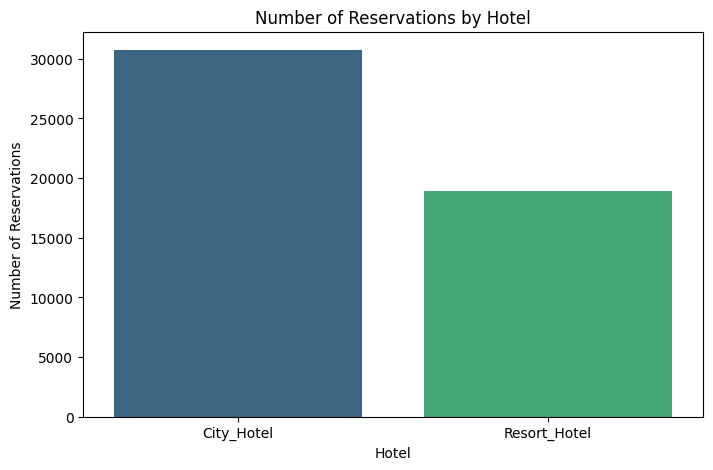

In [7]:
plot_reservations_by_hotel(hotels_preprocessed)

1. Number of Reservations by Hotel
Conclusion: The city hotel has a significantly higher number of reservations compared to the resort hotel. This may be due to location, accessibility, and customer demand for urban stays.

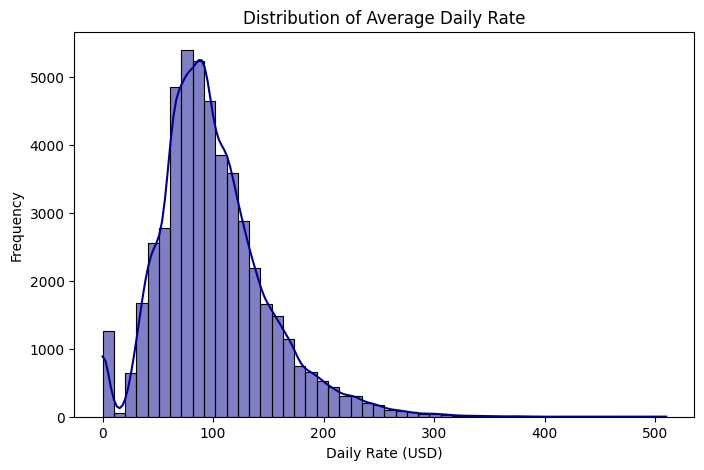

In [8]:
plot_daily_rate_hist(hotels_preprocessed)

2. Distribution of Average Daily Rate
Conclusion: Most daily rates are concentrated between 50 and 150 USD, with a right-skewed distribution. This suggests that most customers opt for moderate rates, with fewer customers willing to pay very high rates.

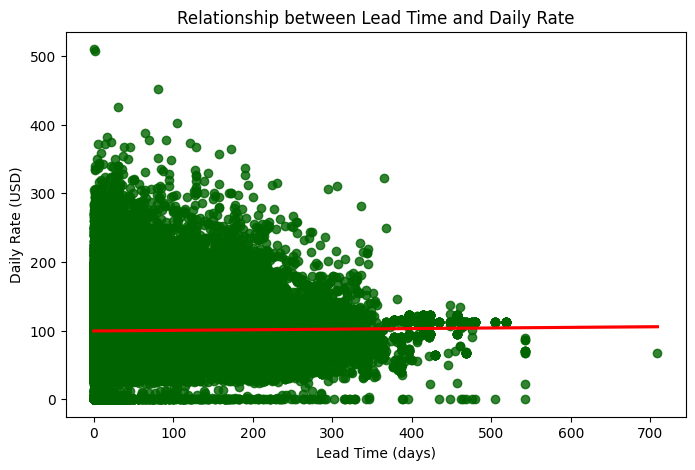

In [9]:
plot_lead_time_vs_rate(hotels_preprocessed)

3. Relationship between Lead Time and Daily Rate
Conclusion: There is no clear relationship between lead time and daily rate. However, there is a trend towards lower rates for bookings made further in advance. This can be used for dynamic pricing strategies.

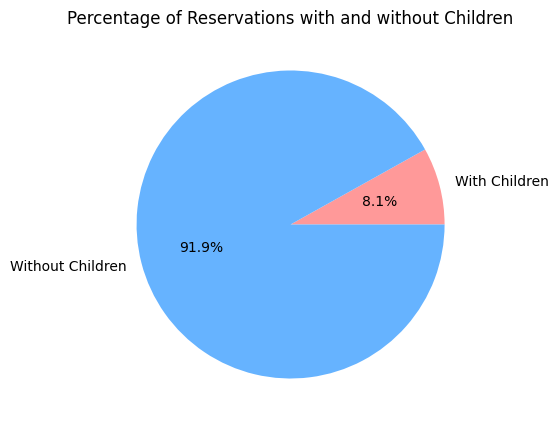

In [10]:
plot_reservations_with_children(hotels_preprocessed)

4. Percentage of Reservations with and without Children
Conclusion: The majority of reservations (91.9%) are without children, while only 8.1% include children. This may indicate that hotels are more frequently booked by solo adults or couples, and less by families.

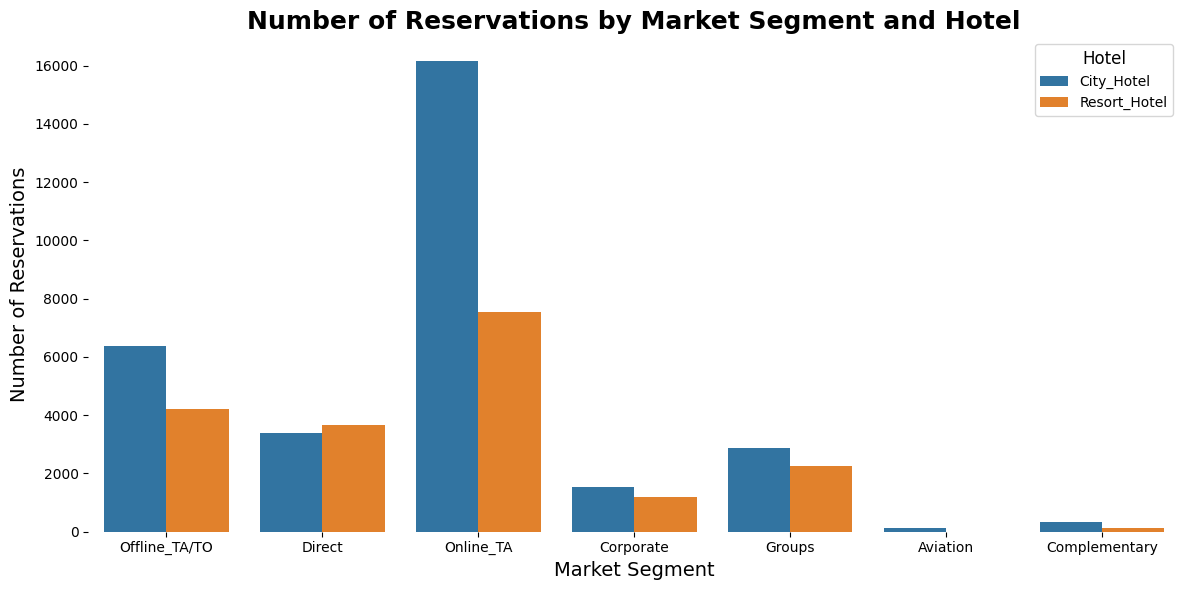

In [11]:
plot_reservations_by_market_segment(hotels_preprocessed)

5. Number of Reservations by Market Segment and Hotel
Conclusion: The largest market segment is online travel agencies (Online_TA), especially for city hotels. Corporate and group segments are smaller in comparison. This suggests that marketing and sales strategies should focus on strengthening relationships with online travel agencies.

c:\Users\yamil\Downloads\fligoo_assessment\src\plots\plots.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reserved_room_type', y='average_daily_rate', palette='viridis', ax=ax)


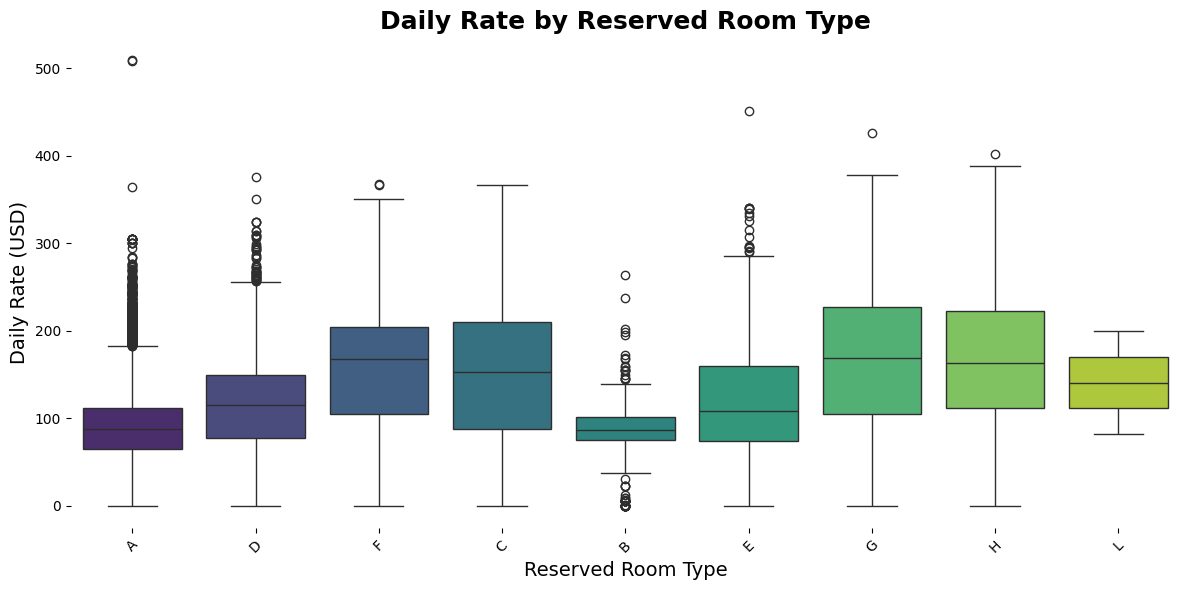

In [12]:
plot_daily_rate_by_room_type(hotels_preprocessed)

6. Daily Rate by Reserved Room Type
Conclusion: Daily rates vary considerably by reserved room type. Room types 'G' and 'H' have the highest rates, while types 'A' and 'B' are more economical. This may reflect differences in room size, amenities, and location.

c:\Users\yamil\Downloads\fligoo_assessment\src\plots\plots.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rate_by_country.index, y=avg_rate_by_country.values, palette='rocket', ax=ax)


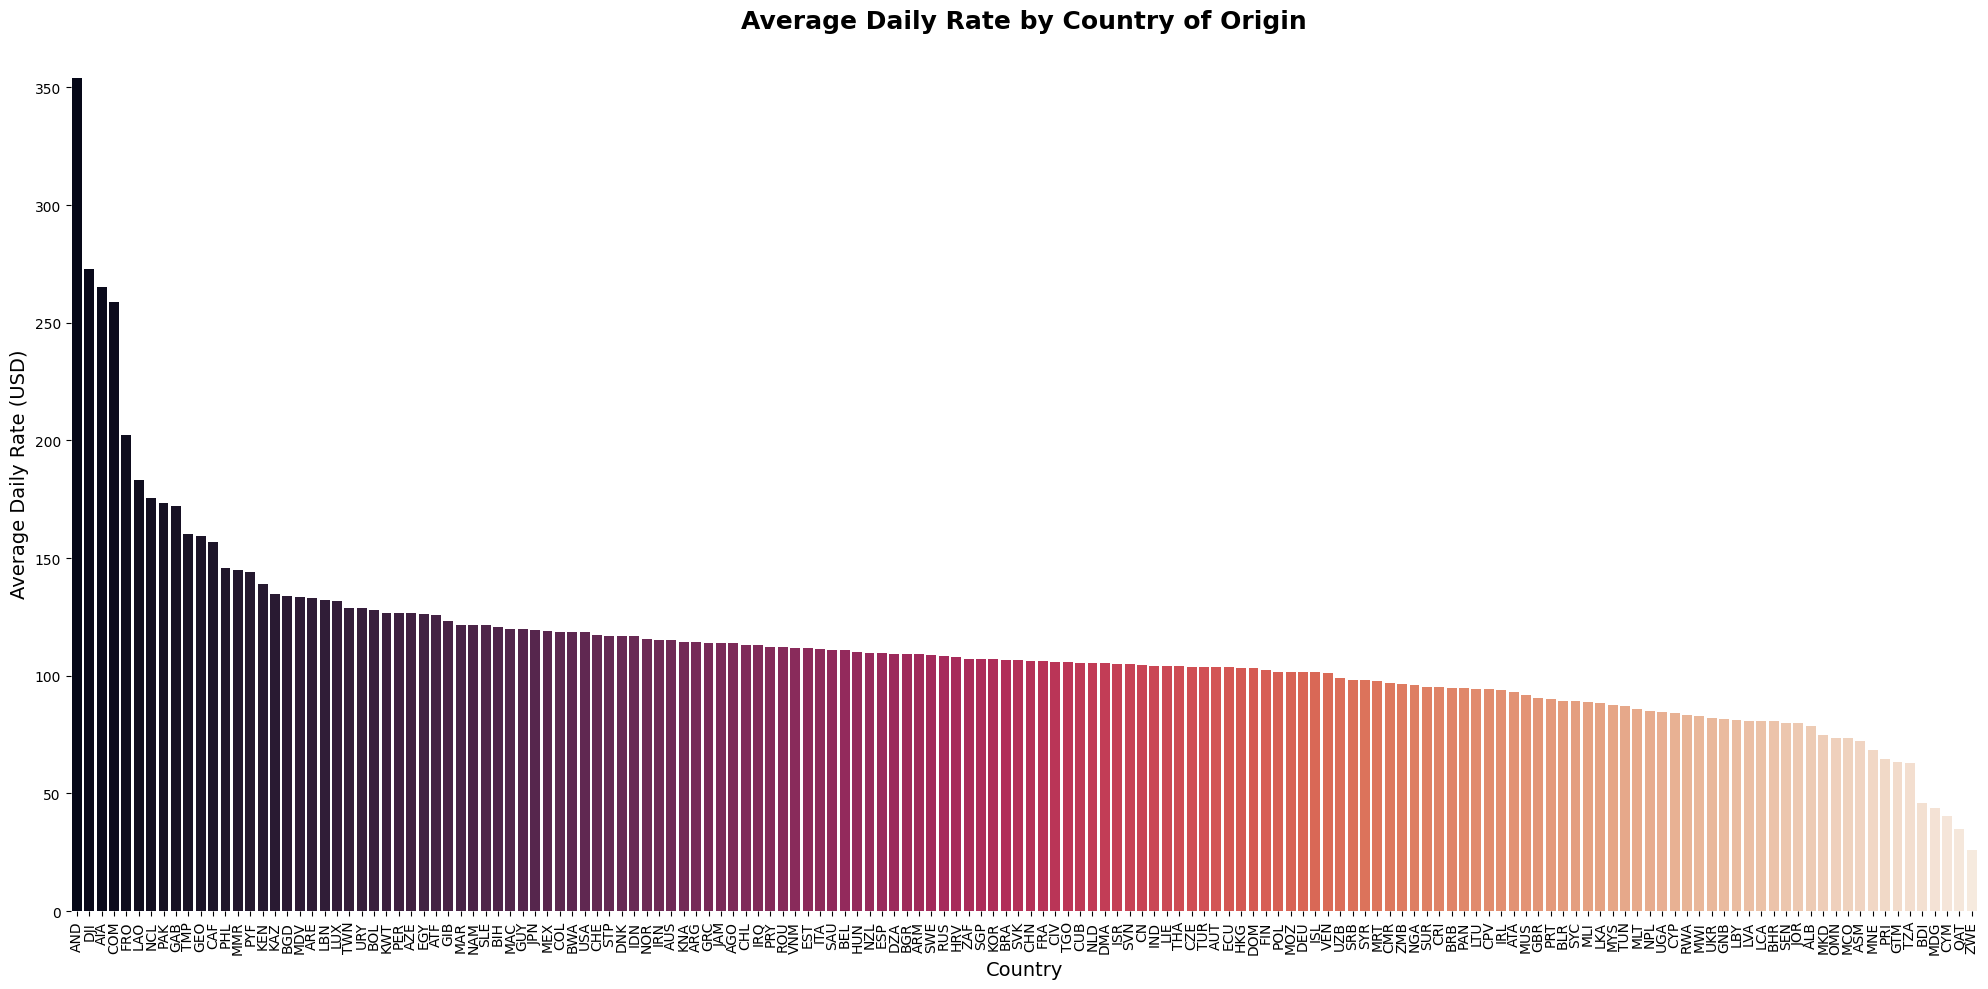

In [13]:
plot_avg_daily_rate_by_country(hotels_preprocessed)

7. Average Daily Rate by Country of Origin
Conclusion: There is significant variability in average daily rates by country of origin. Countries with higher rates may be associated with higher purchasing power or specific tourist seasons.

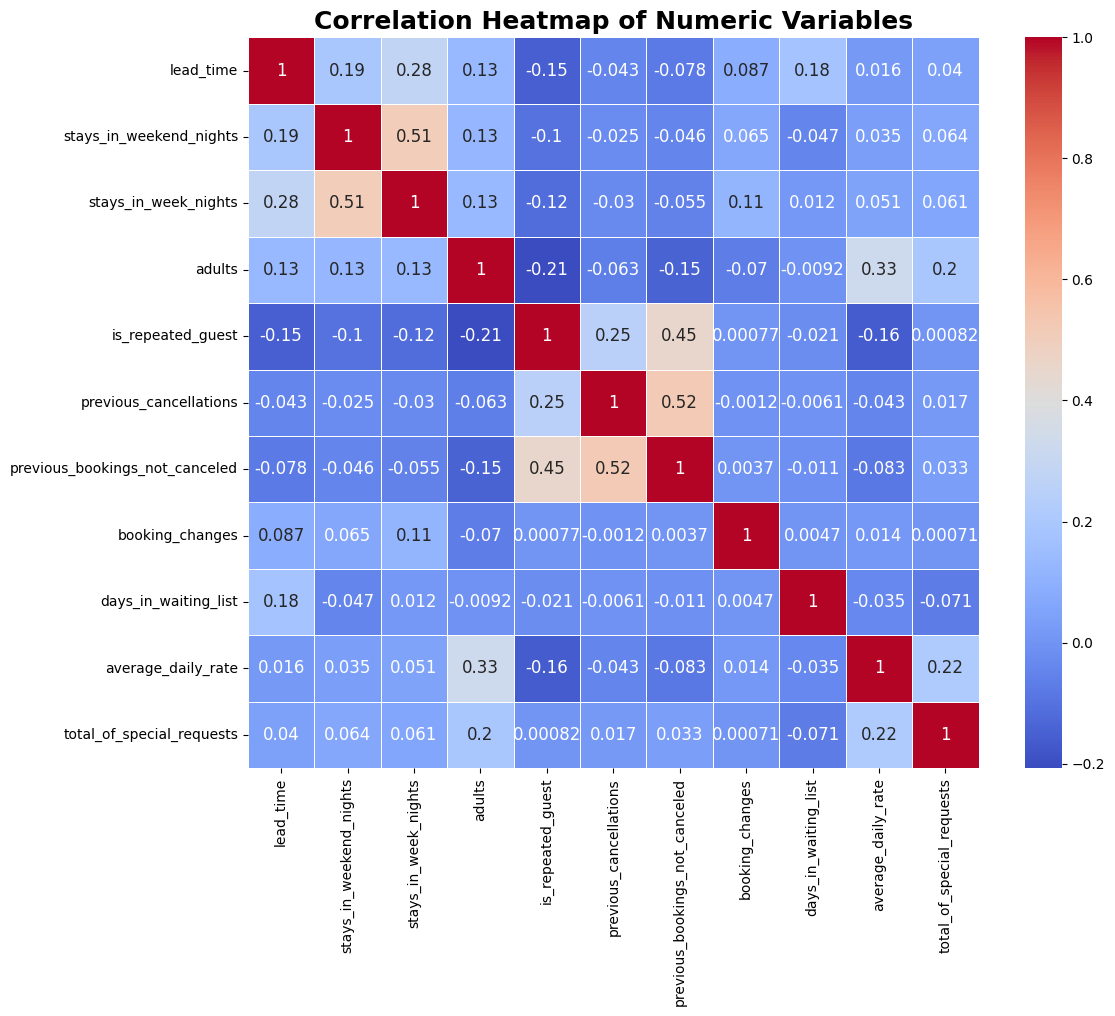

In [14]:
plot_correlation_heatmap(hotels_preprocessed)

8. Correlation Heatmap of Numeric Variables
Conclusion: The strongest correlations are observed between previous cancellations and previous bookings not canceled (0.52), and between weekday and weekend nights (0.51). This suggests that customers with a history of cancellations tend to have consistent behavior, and that stays often include both weekday and weekend nights.

c:\Users\yamil\Downloads\fligoo_assessment\src\plots\plots.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_nights_by_customer.index, y=avg_nights_by_customer.values, palette='deep', ax=ax)


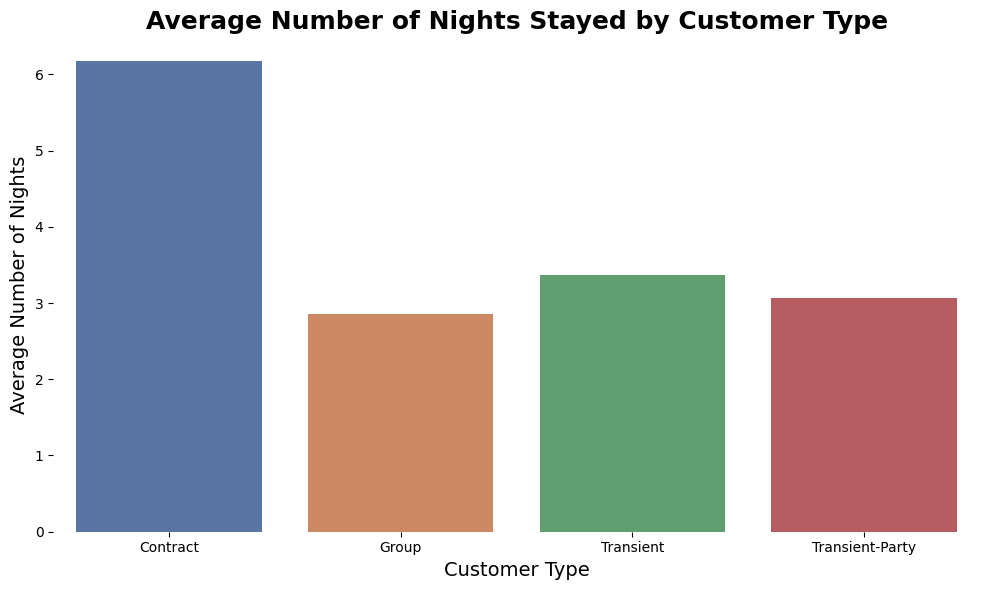

In [15]:
plot_avg_nights_by_customer_type(hotels_preprocessed)

9. Average Number of Nights Stayed by Customer Type
Conclusion: Contract customers have the longest stays, averaging over 6 nights. Transient and group customers have shorter stays, around 3 to 4 nights. This indicates that contracts may be associated with longer stays, possibly due to corporate or long-term agreements.

c:\Users\yamil\Downloads\fligoo_assessment\src\plots\plots.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_changes_by_deposit.index, y=avg_changes_by_deposit.values, palette='magma', ax=ax)


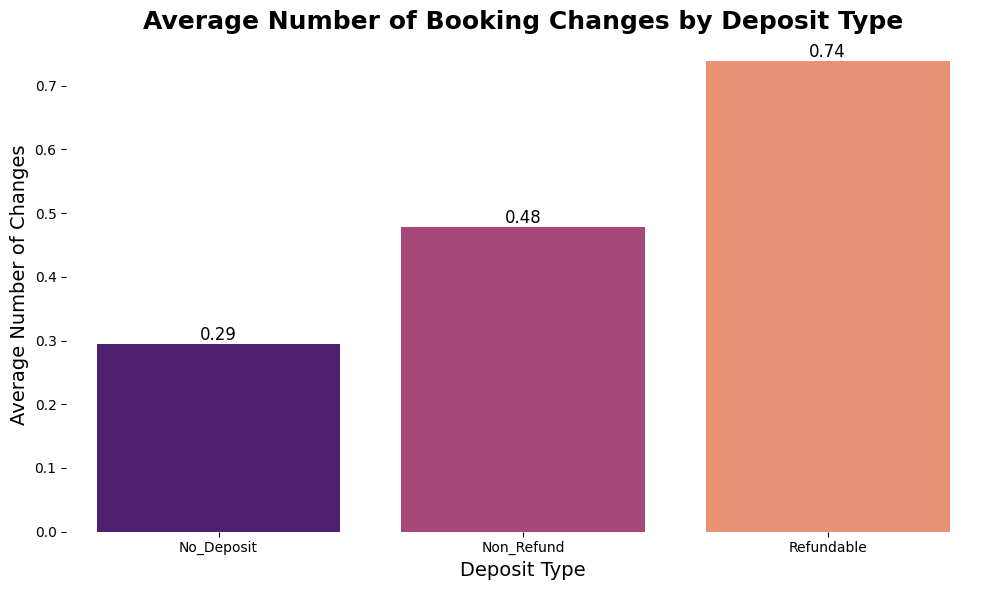

In [16]:
plot_avg_booking_changes_by_deposit_type(hotels_preprocessed)

10. Average Number of Booking Changes by Deposit Type
Conclusion: Bookings with refundable deposits have a significantly higher average number of changes (0.74) compared to no deposit (0.29) and non-refundable deposits (0.48). This suggests that customers who opt for refundable deposits tend to modify their bookings more, possibly due to the flexibility these deposits offer.

# Business Perspective
Flexibility and Changes: Refundable deposits attract customers who value flexibility, which can be a strategy to increase customer satisfaction.
Customer Segmentation: Contract customers and transient customers have different stay patterns, suggesting the need for differentiated marketing strategies.
Pricing Strategies: Variability in daily rates by country and room type indicates opportunities for dynamic and personalized pricing strategies.
Focus on Online Travel Agencies: Given the high volume of bookings through online travel agencies, it is crucial to maintain and strengthen these relationships.
Families vs. Adults: The low proportion of bookings with children suggests that hotels could explore specific offers and promotions to attract more families.
This analysis provides a solid foundation for strategic decision-making in marketing, pricing, and reservation management, aiming to optimize occupancy and customer satisfaction.

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [17]:
#
# Develop Machine/Statistical Learning models to predict the target variable...
#

## Part III - Results & Conclusions

In [18]:
#
# List your key insights / findings and conclusions...
#